### 공부시간에 따른 점수 예측하기
- 목표 : 공부시간으로 점수를 예측
- 데이터셋 : 임의로 생성
- 피쳐/속성 : 공부시간
- 타겟/라벨 : 점수
- 학습방법 : 지도학습 > 회귀
- 알고리즘 : 선형회귀 <== [조건] 데이터분포가 선형 분포여야함!

[1] 데이터 준비

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 14개씩 데이터셋
jumsu = range(7, 100, 7)
hours = range(1, 29, 2)

In [3]:
# List => DataFrame로 변환
hourDF = pd.DataFrame(hours, columns=['Hour'])
hourDF

,Hour
0,1
1,3
2,5
3,7
4,9
5,11
6,13
7,15
8,17
9,19


In [4]:
# jumsuDF = pd.DataFrame(jumsu, columns=['Jumsu'])
# jumsuDF
jumsuSR = pd.Series(jumsu)
jumsuSR

0      7
1     14
2     21
3     28
4     35
5     42
6     49
7     56
8     63
9     70
10    77
11    84
12    91
13    98
dtype: int64

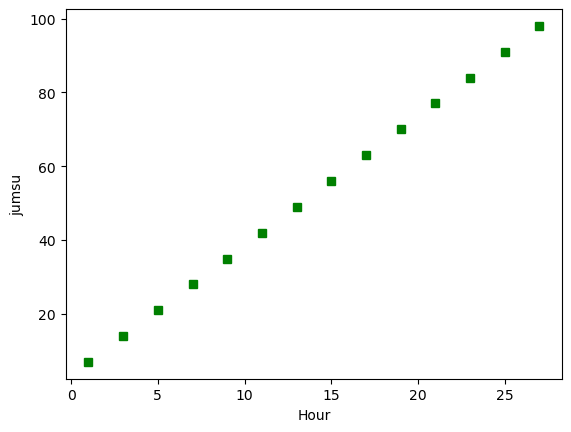

In [5]:
# 현재 데이터의 분포 확인

plt.plot(hourDF, jumsuSR, 'gs')
plt.xlabel('Hour')
plt.ylabel('jumsu')
plt.show()

[2] 모델 생성 및 학습 진행

In [6]:
# 모듈로딩
from sklearn.linear_model import LinearRegression

In [7]:
# 학습 모델 인스턴스 생성
model = LinearRegression()

In [8]:
# 학습 진행 => 최대한 많은 데이터를 만족하는 직선의 기울기와 절편 찾기
model.fit(hourDF, jumsuSR)

LinearRegression()

In [9]:
# 학습 후 모델 파라미터
print(f'기울기 : {model.coef_}, 절편 : {model.intercept_}')

기울기 : [3.5], 절편 : 3.500000000000014


In [10]:
# y=ax+b
pre_jumsu = model.coef_[0]*hourDF+model.intercept_
pre_jumsu=pre_jumsu.values.reshape(-1)

In [11]:
# 실제 점수와 예측 점수의 차이 확인
real_jumsu = jumsuSR.to_numpy()
real_jumsu - pre_jumsu

array([-1.33226763e-14, -1.06581410e-14, -1.06581410e-14, -7.10542736e-15,
       -7.10542736e-15, -7.10542736e-15,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.42108547e-14,  1.42108547e-14])

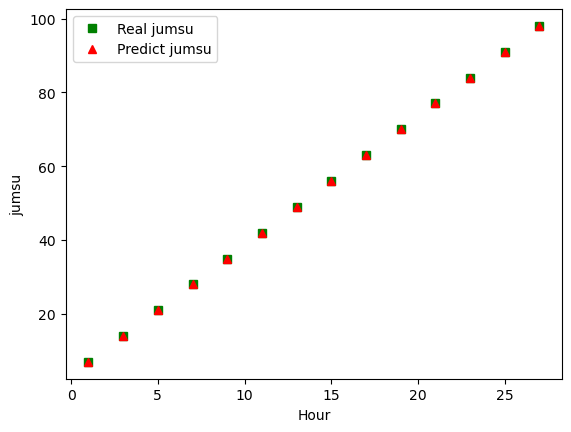

In [12]:
# 현재 데이터의 분포 확인

plt.plot(hourDF, jumsuSR, 'gs', label='Real jumsu')
plt.plot(hourDF, pre_jumsu, 'r^', label='Predict jumsu')
plt.xlabel('Hour')
plt.ylabel('jumsu')
plt.legend()
plt.show()

[3] 모델 성능 평가

In [13]:
model.score(hourDF, jumsuSR)

1.0

In [14]:
### 오차 계산 즉, 손실/비용함수 확인
### root_mean_squared_error는 v.1.4 이상

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [15]:
import sklearn
sklearn.__version__

'1.3.0'

In [16]:
pre_y = model.predict(hourDF)

In [17]:
## 손실/비용함수 값은 0에 가까울수록
## 결정계수 값은 1에 가까울수록 성능 좋은 모델
mse=mean_squared_error(jumsuSR, pre_y)
rmse=mean_squared_error(jumsuSR, pre_y, squared=False)
mae=mean_absolute_error(jumsuSR, pre_y)
r2=r2_score(jumsuSR, pre_y)

In [18]:
print(f'mse: {mse}')
print(f'rmse: {rmse}')
print(f'mae: {mae}')
print(f'r2: {r2}')

mse: 6.857455154671224e-29
rmse: 8.280975277508818e-15
mae: 6.026924990822278e-15
r2: 1.0
